In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [61]:
import io

In [62]:
from google.colab import files
uploaded = files.upload()

Saving TSM.csv to TSM.csv


In [63]:
df = pd.read_csv(io.BytesIO(uploaded['TSM.csv']))
print(df)

           Date       Open       High        Low      Close  Adj Close  \
0      1/4/2010  11.490000  11.690000  11.470000  11.580000   7.458041   
1      1/5/2010  11.600000  11.660000  11.460000  11.530000   7.425838   
2      1/6/2010  11.560000  11.610000  11.380000  11.490000   7.400078   
3      1/7/2010  11.410000  11.440000  11.070000  11.110000   7.155339   
4      1/8/2010  11.140000  11.220000  11.030000  11.100000   7.148899   
...         ...        ...        ...        ...        ...        ...   
2635  6/23/2020  56.639999  57.160000  56.529999  56.759998  53.146317   
2636  6/24/2020  56.709999  57.060001  56.160000  56.580002  52.977772   
2637  6/25/2020  56.560001  57.090000  55.950001  57.040001  53.408482   
2638  6/26/2020  57.000000  57.259998  56.209999  56.330002  52.743690   
2639  6/29/2020  56.340000  56.410000  55.660000  56.389999  52.799870   

        Average  
0     10.737608  
1     10.735168  
2     10.688016  
3     10.437068  
4     10.327780  
...

In [64]:
data_training = df[df['Date'] < '2020-03-15'].copy()
data_testing = df[df['Date'] >= '2020-03-15'].copy()

In [65]:
data_training = data_training.drop(['Date'], axis = 1)

In [66]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.03738133, 0.03887689, 0.04097387, 0.03979511, 0.02634788,
        0.03672851],
       [0.03955696, 0.03828785, 0.04077593, 0.03881009, 0.02569569,
        0.03668011],
       [0.03876582, 0.03730611, 0.0391924 , 0.03802206, 0.02517399,
        0.0357451 ],
       ...,
       [0.88785605, 0.89731005, 0.89034051, 0.89578406, 0.90136546,
        0.89450489],
       [0.88212027, 0.88140583, 0.868369  , 0.86150514, 0.8689223 ,
        0.87248621],
       [0.82575154, 0.87060671, 0.8234363 , 0.87234043, 0.8791772 ,
        0.85418872]])

In [67]:
x_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    x_train.append(data_training[i-20:i])
    y_train.append(data_training[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [68]:
x_train.shape

(1008, 20, 6)

In [69]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [70]:
regressorGRU = Sequential()

regressorGRU.add(GRU(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 6)))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 60, activation = 'relu', return_sequences = True))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 80, activation = 'relu', return_sequences = True))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 120, activation = 'relu'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(Dense(units = 1))

In [71]:
regressorGRU.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 20, 60)            12240     
                                                                 
 dropout_12 (Dropout)        (None, 20, 60)            0         
                                                                 
 gru_13 (GRU)                (None, 20, 60)            21960     
                                                                 
 dropout_13 (Dropout)        (None, 20, 60)            0         
                                                                 
 gru_14 (GRU)                (None, 20, 80)            34080     
                                                                 
 dropout_14 (Dropout)        (None, 20, 80)            0         
                                                                 
 gru_15 (GRU)                (None, 120)              

In [72]:
regressorGRU.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressorGRU.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
32/32 [==============================] - 7s 45ms/step - loss: 0.0466
Epoch 2/50
32/32 [==============================] - 1s 45ms/step - loss: 0.0037
Epoch 3/50
32/32 [==============================] - 2s 74ms/step - loss: 0.0034
Epoch 4/50
32/32 [==============================] - 1s 45ms/step - loss: 0.0042
Epoch 5/50
32/32 [==============================] - 1s 44ms/step - loss: 0.0031
Epoch 6/50
32/32 [==============================] - 1s 45ms/step - loss: 0.0039
Epoch 7/50
32/32 [==============================] - 1s 46ms/step - loss: 0.0026
Epoch 8/50
32/32 [==============================] - 1s 45ms/step - loss: 0.0030
Epoch 9/50
32/32 [==============================] - 1s 45ms/step - loss: 0.0028
Epoch 10/50
32/32 [==============================] - 1s 44ms/step - loss: 0.0025
Epoch 11/50
32/32 [==============================] - 2s 76ms/step - loss: 0.0025
Epoch 12/50
32/32 [==============================] - 1s 45ms/step - loss: 0.0021
Epoch 13/50
32/32 [==================

In [73]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close,Average
38,3/1/2010,9.91,10.00,9.89,9.95,6.408247,9.231649
39,3/2/2010,10.02,10.10,9.90,9.95,6.408247,9.275649
40,3/3/2010,10.06,10.07,9.81,9.86,6.350284,9.230057
41,3/4/2010,9.77,9.91,9.75,9.87,6.356723,9.131345
42,3/5/2010,9.99,10.15,9.96,10.13,6.524177,9.350835


In [74]:
past_20_days = data_testing.tail(20)

In [75]:
df = past_20_days.append(data_testing, ignore_index = True)
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-75-08f6f3976b94>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_20_days.append(data_testing, ignore_index = True)


,Open,High,Low,Close,Adj Close,Average
0,51.450001,52.040001,51.290001,52.009998,48.337364,51.025473
1,52.639999,53.250000,52.419998,53.060001,49.313217,52.136643
2,53.060001,54.369999,53.029999,54.279999,50.447067,53.037413
3,55.500000,56.340000,55.060001,55.200001,51.302097,54.680420
4,55.740002,55.779999,54.709999,55.570000,51.645973,54.689195


In [76]:
inputs = scaler.transform(df)
inputs

array([[0.82772945, 0.83114082, 0.82917662, 0.83628838, 0.85425657,
        0.83562614],
       [0.8512658 , 0.8548989 , 0.85154394, 0.85697401, 0.87402004,
        0.85766034],
       [0.8595728 , 0.87688985, 0.86361838, 0.88100865, 0.89698334,
        0.87552237],
       ...,
       [0.92879749, 0.9302965 , 0.92141732, 0.93538221, 0.95695942,
        0.93446197],
       [0.9375    , 0.93363438, 0.92656375, 0.92139484, 0.94349571,
        0.93245998],
       [0.9244462 , 0.91694484, 0.915677  , 0.92257681, 0.9446335 ,
        0.92475089]])

In [77]:
x_test = []
y_test = []

for i in range(20, inputs.shape[0]):
    x_test.append(inputs[i-20:i])
    y_test.append(inputs[i,0])

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((1572, 20, 6), (1572,))

In [78]:
x_test.shape

(1572, 20, 6)

In [79]:
y_pred = regressorGRU.predict(x_test)

50/50 [==============================] - 1s 14ms/step


In [80]:
scaler.scale_

array([0.01977848, 0.01963479, 0.01979414, 0.01970055, 0.0202525 ,
       0.01982973])

In [81]:
scale = 1 / 0.01977848
scale

50.56000258867213

In [82]:
y_pred = y_pred * scale
y_test = y_test * scale

In [83]:
y_pred.shape

(1572, 1)

In [84]:
y_test.shape

(1572,)

In [85]:
y_pred[1503:]

array([[28.299055],
       [27.989788],
       [28.18894 ],
       [28.576563],
       [28.980553],
       [28.99836 ],
       [28.93218 ],
       [28.923805],
       [28.78163 ],
       [28.728838],
       [28.695127],
       [28.927399],
       [29.31622 ],
       [29.634409],
       [29.729923],
       [29.69612 ],
       [29.867676],
       [29.973846],
       [30.35913 ],
       [30.94367 ],
       [31.339365],
       [31.42627 ],
       [31.577948],
       [31.729017],
       [31.839104],
       [32.014305],
       [32.145912],
       [32.360184],
       [32.499714],
       [32.366066],
       [32.21056 ],
       [32.094227],
       [32.03824 ],
       [32.05529 ],
       [32.119377],
       [32.149685],
       [32.064873],
       [31.908478],
       [31.756187],
       [31.50503 ],
       [31.428947],
       [31.380287],
       [31.395926],
       [31.396996],
       [31.253368],
       [31.193556],
       [31.217224],
       [31.18367 ],
       [31.080608],
       [31.058346],


In [86]:
y_test[1503:]

array([35.52000082, 38.40000197, 39.70000103, 39.50000002, 37.63000193,
       37.58000192, 38.20000096, 37.23000391, 37.31999991, 38.19000296,
       39.030003  , 41.69000313, 40.61000108, 40.68000108, 39.140004  ,
       40.40000207, 40.16000006, 42.21000316, 44.53000328, 43.40000222,
       42.00000015, 42.8800022 , 43.21000321, 43.0000002 , 43.55000423,
       43.91000025, 44.15000226, 44.60000328, 42.8800022 , 42.19000316,
       42.61000118, 42.51000318, 43.35000322, 43.0200012 , 43.0100032 ,
       43.0400012 , 42.31000217, 40.83000209, 40.9600031 , 41.34000112,
       41.75000014, 41.98000415, 42.50000018, 41.24000211, 41.70000114,
       41.43000112, 41.86000114, 40.74000209, 41.31000212, 41.85000314,
       43.0400012 , 43.46000323, 45.90000235, 46.14000436, 45.69000334,
       47.22000242, 46.25000037, 46.9000024 , 45.11000131, 46.99000241,
       46.55000438, 46.44000338, 46.8800024 , 45.90000235, 47.04000141,
       47.11000141, 46.9600034 , 47.40000243, 46.74000239])

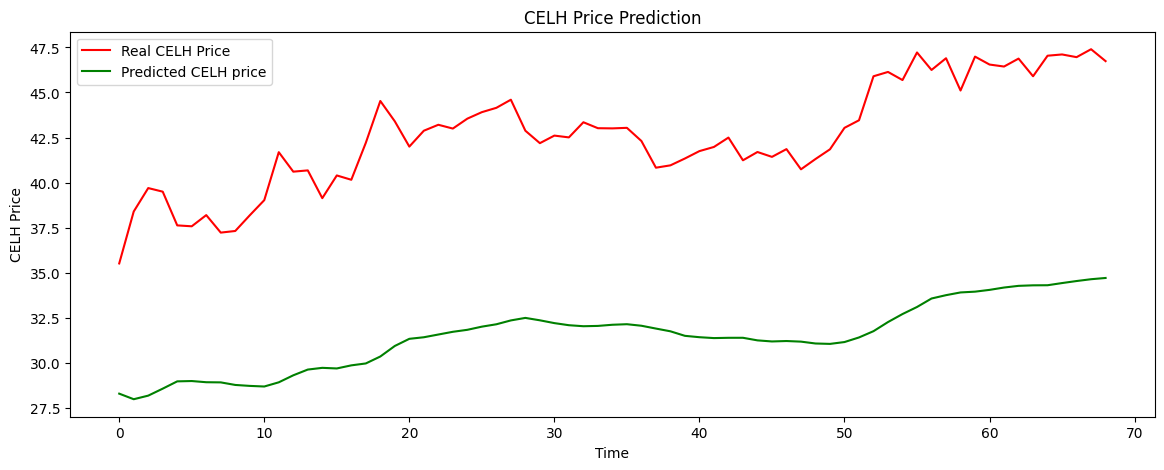

In [87]:
plt.figure(figsize = (14,5))
plt.plot(y_test[1503:], color = 'red', label = 'Real CELH Price')
plt.plot(y_pred[1503:], color = 'green', label = 'Predicted CELH price')
plt.title('CELH Price Prediction')
plt.xlabel('Time')
plt.ylabel('CELH Price')
plt.legend()
plt.show()